In [20]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def load_data(url):
    data=pd.read_csv(url,encoding='latin1')
    return data

In [22]:
data=load_data(r"C:\Users\91938\Desktop\Top Mentor\Machine Learning\2nd november\File\Multi Linear Regression - Assignment -3_4\3. Multi Linear Regression\ToyotaCorolla.csv")
data.shape

(1436, 38)

In [23]:
data.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [24]:
#Dataset contains 1436 records and 38 columns
#Price is the target variable
#No missing values observed

In [26]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


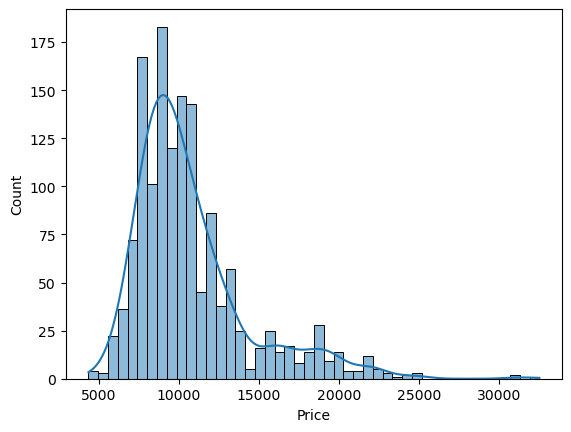

In [28]:
sns.histplot(data['Price'], kde=True)
plt.show()

In [29]:
#Price distribution shows skewness, indicating possible transformation.

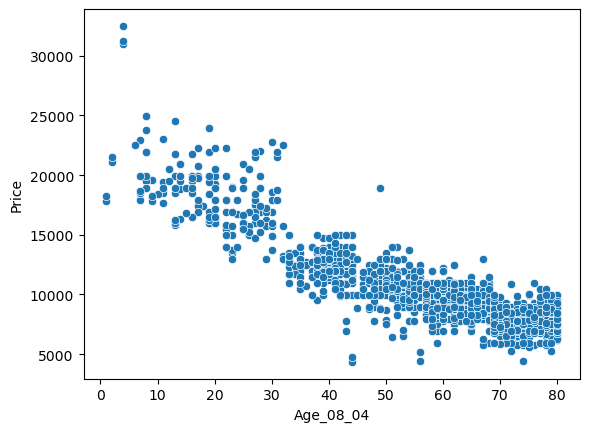

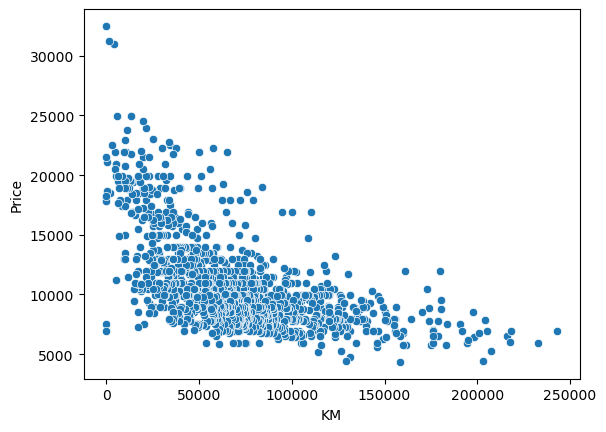

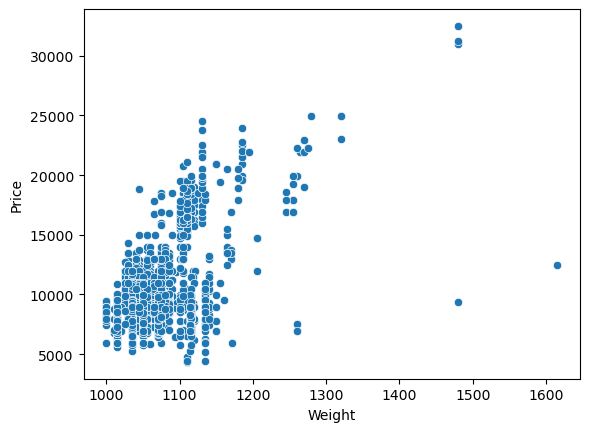

In [33]:
sns.scatterplot(x='Age_08_04', y='Price', data=data)
plt.show()

sns.scatterplot(x='KM', y='Price', data=data)
plt.show()

sns.scatterplot(x='Weight', y='Price', data=data)
plt.show()


In [34]:
#Price decreases as age increases
#Higher KM reduces price
#Heavier cars tend to have higher prices

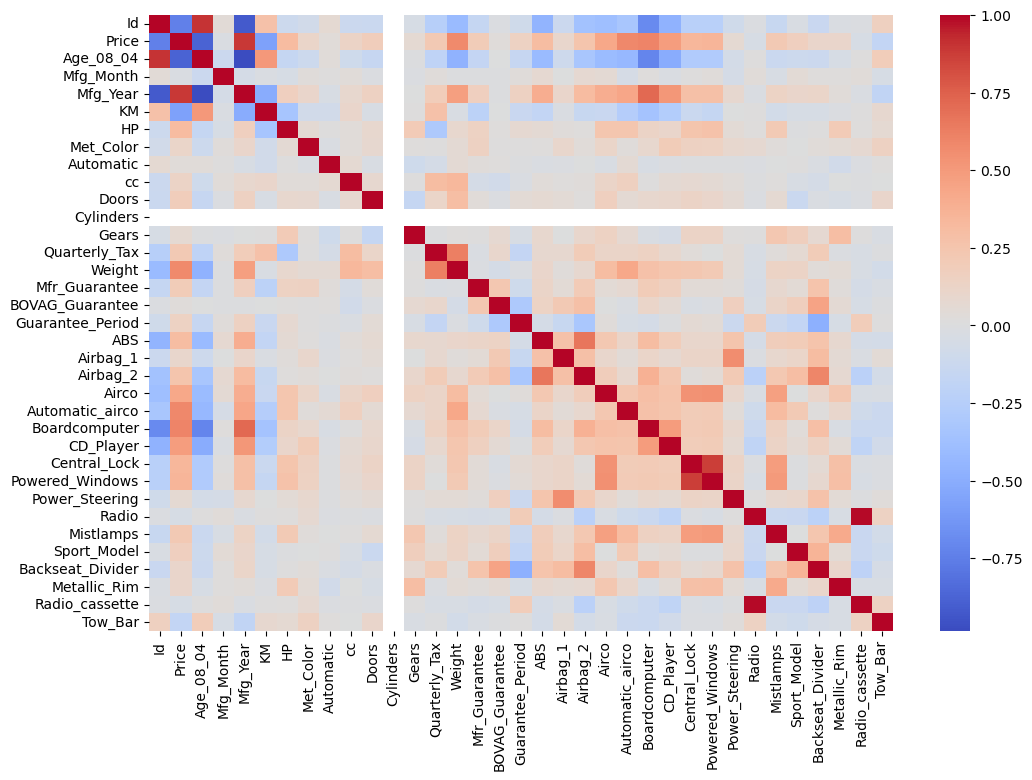

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')
plt.show()

In [38]:
#Age, KM, Weight, HP show strong influence on Price
#Many binary features have weak correlation

In [55]:
df = pd.get_dummies(data, drop_first=True)

In [56]:
#Multiple Linear Regression (All Features)

In [119]:
def regression_model(data,column,apply_log_transformation:bool,feature_selected:bool,knn:bool):
    selected_features = [
        'Age_08_04','KM','HP','Weight'
    ]
    X = data[selected_features] if feature_selected else data.drop(column, axis=1)
    y = np.log(data[column]) if apply_log_transformation else data[column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1
    )
    model = KNeighborsRegressor(n_neighbors=3) if knn else LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2_value = r2_score(y_test, pred)
    return r2_value

In [120]:
r2_1=regression_model(df,"Price",0,0,0)

In [121]:
r2_1

-27.379354727382477

In [122]:
#Negative R² occurred due to multicollinearity and improper handling of categorical variables.

In [123]:
#Remove highly correlated features
corr = df.corr()
high_corr = corr['Price'].abs().sort_values(ascending=False)
high_corr.head(10)

Price              1.000000
Mfg_Year           0.885159
Age_08_04          0.876590
Id                 0.738250
Boardcomputer      0.601292
Automatic_airco    0.588262
Weight             0.581198
KM                 0.569960
CD_Player          0.481374
Airco              0.429259
Name: Price, dtype: float64

In [124]:
#Keep only strong ones:
selected = high_corr[high_corr > 0.3].index
df_new = df[selected]
df_new.columns

Index(['Price', 'Mfg_Year', 'Age_08_04', 'Id', 'Boardcomputer',
       'Automatic_airco', 'Weight', 'KM', 'CD_Player', 'Airco',
       'Powered_Windows', 'Central_Lock', 'HP', 'ABS'],
      dtype='object')

In [125]:
r2_1_new=regression_model(df_new,"Price",0,0,0)

In [126]:
r2_1_new

0.9108677281629398

In [127]:
#Log Transformation of Price

In [128]:
r2_2=regression_model(df_new,"Price",1,0,0)
r2_2

0.8740016108716386

In [129]:
#feature selection model

In [130]:
r2_3=regression_model(df_new,"Price",1,1,0)

In [131]:
r2_3

0.8542735722777213

In [132]:
#KNN Regression

In [133]:
r2_4=regression_model(df,"Price",0,0,1)

In [134]:
r2_4

0.6668786112400236

In [135]:
results = pd.DataFrame({
    'Model': [
        'All Features',
        'Log Transformed Price',
        'Feature Selected Model',
        'KNN regression model'
    ],
    'R2 Score': [
        r2_1_new, r2_2, r2_3, r2_4
    ]
})

results

,Model,R2 Score
0,All Features,0.910868
1,Log Transformed Price,0.874002
2,Feature Selected Model,0.854274
3,KNN regression model,0.666879


In [ ]:
#After identifying and removing highly correlated features during exploratory data analysis, the multiple linear regression model using the refined feature set achieved the highest R² score and was selected as the best-performing model.